<a href="https://colab.research.google.com/github/huyphuong99/crnn_ctc_data_name/blob/main/CRNN_CTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "NAME"

In [ ]:
!mkdir /content/data
!mkdir ./data/file_padding
!cp /content/drive/MyDrive/tima/recognition_OCR/Data/{data}.zip /content/data
!unzip /content/data/{data}.zip -d /content/data 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/data/NAME/1157_3_HẰNG.png  
  inflating: /content/data/NAME/1158_0_HOÀNG.png  
  inflating: /content/data/NAME/1158_1_NGỌC.png  
  inflating: /content/data/NAME/1158_2_KIÊN.png  
  inflating: /content/data/NAME/1159_0_PHAN.png  
  inflating: /content/data/NAME/1159_1_THỊ.png  
  inflating: /content/data/NAME/1159_2_CẨM.png  
  inflating: /content/data/NAME/1159_3_VÂN.png  
  inflating: /content/data/NAME/1160_0_PHẠM.png  
  inflating: /content/data/NAME/1160_1_VĂN.png  
  inflating: /content/data/NAME/1160_2_ĐẢO.png  
  inflating: /content/data/NAME/1161_0_TRẦN.png  
  inflating: /content/data/NAME/1161_1_THỊ.png  
  inflating: /content/data/NAME/1161_2_TUYẾT.png  
  inflating: /content/data/NAME/1161_3_QUỲNH.png  
  inflating: /content/data/NAME/1162_0_DƯƠNG.png  
  inflating: /content/data/NAME/1162_1_VĂN.png  
  inflating: /content/data/NAME/1162_2_HÙNG.png  
  inflating: /content/data/NAME/1163_0_NGUYỄN.

In [ ]:
!mkdir /content/data
!cp /content/drive/MyDrive/WorkTima/NAME.zip /content/data

mkdir: cannot create directory ‘/content/data’: File exists
cp: cannot stat '/content/drive/MyDrive/WorkTima/NAME.zip': No such file or directory


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
 
from pathlib import Path
from collections import Counter
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob
import pandas as pd
import cv2 as cv

In [ ]:
batch_size = 16
img_height = 50
img_width = 235
max_len = 7

In [ ]:


NULL_CHAR = '<nul>'
characters = "aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ"
characters = characters.upper() # Chỉ lấy chữ viết hoa vì trong tập dữ liệu họ tên cmnd chỉ có chữ viết hoa.
characters = set(characters) # loại bỏ những ký tự lặp lại
characters = sorted(characters) # sort lại vì vừa gọi hàm set làm mất thứ tự
characters.append(NULL_CHAR)


In [ ]:
data_dir = Path("./data/NAME/")
# images = sorted(list(map(str, list(data_dir.glob("*.png")))))
# labels = [img.split("/")[-1].split("_")[-1].replace(".png", "") for img in images]

images = []
labels = []
for file in glob.glob("./data/NAME/*.png"):
    images.append(file)
    filename = os.path.basename(file)
    label = os.path.splitext(filename)[0].split("_")[-1]
    print(label)
    label_padded = [NULL_CHAR] * max_len
    label_padded[:len(label)] = label
    labels.append(label_padded)


print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)
# print(data_dir)
print(images)
# print(labels)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
HỒNG
NHUNG
THỊ
CHÍ
TRANG
ĐINH
THỊ
TIỆP
ĐĂNG
ĐẶNG
LÊ
MỸ
NAM
HIẾU
VĂN
ĐÀO
XUÂN
NGUYỄN
TUYẾT
KHÂM
TRẦN
ƠN
HUYỀN
GIÀNG
KBUÔR
VÕ
CƯỜNG
VĂN
VĂN
HUYỀN
HẢO
TRUNG
ANH
LÀNH
NGUYỄN
NGUYỄN
HÙNG
TÂM
TIỆP
ANH
CÔNG
BÙI
NGÂN
PHẠM
HỬU
NGUYỄN
VĂN
THI
TRƯỜNG
TRỊNH
GIAO
THỊ
TUẤN
VĂN
PHƯƠNG
KIỆT
NGUYỄN
NGÔ
LƯU
VĂN
TRẦN
TRUNG
THẮM
BẢO
CHÂU
TRÍ
THÚY
THỦY
HOÀNG
MẠNH
NGUYỄN
THỊ
NGUYỄN
HOÀNG
BẠCH
THANH
LÊ
PHẠM
THỊ
HÀ
TUYỀN
HÒA
MY
NHUNG
NGỌC
VÕ
CHÍN
VĂN
BẢO
TRẦN
THANH
QUÂN
THÀNH
KHOA
THANH
HOÀNG
VÂN
BẮC
ÁNH
DŨNG
THỊ
XUÂN
VĂN
TRẦN
TRÁNG
NGUYỄN
DUYÊN
LÊ
XUÂN
LIÊM
LÊ
MINH
VĂN
NGUYỄN
HẰNG
VÕ
LIÊN
VĂN
VĂN
HÃO
NĂM
VĂN
LƯƠNG
KHOA
NGUYỄN
THỊ
MINH
TRƯƠNG
QUỲNH
HÀ
THANH
TRẦN
THUẬT
LƯ
TRẦN
LÊ
TRÌNH
VĂN
NGUYỄN
VĂN
THÁI
TRẦN
MAI
MINH
QUÝ
LÊ
LÊ
ĐẶNG
THÁI
GIÁC
KIM
TẤN
HỒNG
LÊ
PHƯƠNG
CHỈNH
MỸ
KIM
NAM
HÓA
PHẤN
HOA
TẤN
ANH
NHUNG
VĂN
ĐINH
VŨ
HƯƠNG
THANH
TRỊNH
THỊ
TRƯƠNG
TRẦN
THỊ
THỊ
VĂN
NGUYỄN
HOÀNG
THANH
LÊ
VĂN
THỊ
THỊ
VĂN
VĂN
NGUYỄN
ĐẶNG
TRẦN
NGUYỄN
BẠCH
ĐÌNH
HẢI
THỊ
THỊ
H

In [ ]:
# def data_st():
#     from collections import Counter
#     temp = ''.join(labels)
#     count_chars = Counter(temp)
#     print("STATISTIC CHARACTER")
#     for c in characters:
#         if c not in count_chars:
#             count_chars[c] = 0
#     count_chars = {k: v for k, v in sorted(count_chars.items(), key=lambda item: item[1], reverse=True)}
#     for k, v in count_chars.items():
#         print(f"{k}: {v}")

# data_st()

In [ ]:
list_img = glob.glob(os.path.join(data_dir, "*"))
dict_img = {}
# images = []
for file in list_img:
  file_name = os.path.basename(file)
  img = cv.imread(file)
  height, width = img.shape[:2]
  dict_img[file_name] = [height, width]
#   img = cv.resize(img,(100, 50), interpolation = cv.INTER_AREA)
#   cv.imwrite(os.path.join("./data/resize_name/", file_name), img)

# print(dict_img)
df = pd.DataFrame(dict_img)
df_T = df.transpose()
df_T.columns = ["Height", "Width"]
df_T['rate'] = df_T['Width'] / df_T['Height']

df_describe = df_T.describe()

print("Describe of data:\n", df_describe)
# print(images)



Describe of data:
             Height        Width         rate
count  6113.000000  6113.000000  6113.000000
mean     49.626697   102.657615     2.074256
std      17.011440    48.536737     0.669701
min      15.000000    18.000000     0.450704
25%      39.000000    68.000000     1.550000
50%      48.000000    94.000000     2.000000
75%      58.000000   128.000000     2.500000
max     170.000000   502.000000     4.463415


In [ ]:

#ADD PADDING AND RESIZE IMAGES

def add_padding(image, img_w = 235, img_h = 50):
  img = cv.imread(image)
  name = os.path.basename(image)
  hh, ww, cc = img.shape
  rate = ww/hh
  img = cv.resize(img, (round(rate*img_h),img_h), interpolation = cv.INTER_AREA) #INTER_AREA is interpolation method
  color = (0,0,0)
  result = np.full((img_h, img_w, cc), color, dtype=np.uint8)
  # print(rate)
  result[:img_h, :round(rate * img_h)] = img

  cv.imwrite("/content/data/file_padding/" + name,result)
  # plt.imshow(result)
  # plt.show()
# print(len(images))
for i in images:
  add_padding(i)

In [ ]:
images = []
for file in glob.glob("./data/file_padding/*.png"):
  # print(file)
  images.append(file)
print(images)
print(labels)

['./data/file_padding/868_2_THÙY.png', './data/file_padding/1347_2_LINH.png', './data/file_padding/1823_0_HÀ.png', './data/file_padding/64_2_HƯNG.png', './data/file_padding/1448_2_PHƯƠNG.png', './data/file_padding/1075_1_VĂN.png', './data/file_padding/1326_2_MỸ.png', './data/file_padding/1783_0_MAI.png', './data/file_padding/1338_2_HUYNH.png', './data/file_padding/324_2_LONG.png', './data/file_padding/957_2_LÝ.png', './data/file_padding/300_1_THỊ.png', './data/file_padding/1324_0_NGUYỄN.png', './data/file_padding/994_0_LƯƠNG.png', './data/file_padding/4_2_GIANG.png', './data/file_padding/1170_2_ĐẠT.png', './data/file_padding/1852_1_THỊ.png', './data/file_padding/1310_0_LÊ.png', './data/file_padding/1033_2_ĐÔNG.png', './data/file_padding/948_1_NHẬT.png', './data/file_padding/1372_2_TRƯỜNG.png', './data/file_padding/1841_0_NGUYỄN.png', './data/file_padding/247_0_VÕ.png', './data/file_padding/1160_2_ĐẢO.png', './data/file_padding/234_0_NGÔ.png', './data/file_padding/92_2_BÌNH.png', './dat

In [ ]:
# data_dir = Path("./data/resize_name/")
# images = sorted(list(map(str, list(data_dir.glob("*.png")))))

# img = cv.imread("./data/NAME/1001_2_TƯ.png")
# img = cv.resize(img,(100, 50), interpolation = cv.INTER_AREA)
# plt.imshow(img)
# plt.show()
# print(images)

def split_data(imgs, labels, train_size=0.9):
    size = len(imgs)
    train_sample = int(size * train_size)

    x_train, y_train = imgs[:train_sample], labels[:train_sample]
    x_valid, y_valid = imgs[train_sample:], labels[train_sample:]
    return x_train, y_train, x_valid, y_valid

x_train, y_train, x_valid, y_valid = split_data(np.array(images), np.array(labels))
x = list(map(lambda xx: np.array(xx), labels))
x = np.array(x)
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
x_train, y_train, len(x_train), type(y_train)

(array(['./data/file_padding/868_2_THÙY.png',
        './data/file_padding/1347_2_LINH.png',
        './data/file_padding/1823_0_HÀ.png', ...,
        './data/file_padding/1767_3_THẢO.png',
        './data/file_padding/237_0_NGUYỄN.png',
        './data/file_padding/1894_3_THÚY.png'], dtype='<U37'),
 array([['T', 'H', 'Ù', ..., '<nul>', '<nul>', '<nul>'],
        ['L', 'I', 'N', ..., '<nul>', '<nul>', '<nul>'],
        ['H', 'À', '<nul>', ..., '<nul>', '<nul>', '<nul>'],
        ...,
        ['T', 'H', 'Ả', ..., '<nul>', '<nul>', '<nul>'],
        ['N', 'G', 'U', ..., 'Ễ', 'N', '<nul>'],
        ['T', 'H', 'Ú', ..., '<nul>', '<nul>', '<nul>']], dtype='<U5'),
 5501,
 numpy.ndarray)

In [ ]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=1, mask_token=''
)

print(char_to_num)
# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), invert=True
)

def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)

    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    
    # # 6. Map the characters in label to numbers
    label = char_to_num(label)

    # 7. Return a dict as our model is expecting two inputs
    
    return {"image": img, "label": label}

print(len(x_train))
print(type(y_train))
y_valid[:30]


5501
<class 'numpy.ndarray'>


array([['N', 'G', 'U', 'Y', 'Ễ', 'N', '<nul>'],
       ['P', 'H', 'Ạ', 'M', '<nul>', '<nul>', '<nul>'],
       ['D', 'U', 'Y', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['N', 'G', 'U', 'Y', 'Ễ', 'N', '<nul>'],
       ['T', 'H', 'Ị', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['Đ', 'I', 'N', 'H', '<nul>', '<nul>', '<nul>'],
       ['V', 'Ă', 'N', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['H', 'Ạ', '<nul>', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['D', 'I', 'N', 'H', '<nul>', '<nul>', '<nul>'],
       ['K', 'I', 'Ề', 'U', '<nul>', '<nul>', '<nul>'],
       ['H', 'U', 'Ỳ', 'N', 'H', '<nul>', '<nul>'],
       ['T', 'H', 'Ị', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['T', 'Â', 'M', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['L', 'I', 'N', 'H', '<nul>', '<nul>', '<nul>'],
       ['T', 'H', 'Ị', '<nul>', '<nul>', '<nul>', '<nul>'],
       ['X', 'U', 'Â', 'N', '<nul>', '<nul>', '<nul>'],
       ['T', 'H', 'I', 'Ệ', 'N', '<nul>', '<nul>'],
       ['D', 'U', 'Y', '<nul>', '<nul>',

# Load data 

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
  train_dataset.map(
      encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)) # take  a tensor 
validation_dataset = (
    validation_dataset.map(
      encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE #Tune training process obtained efficiency
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

# Display images in a batch

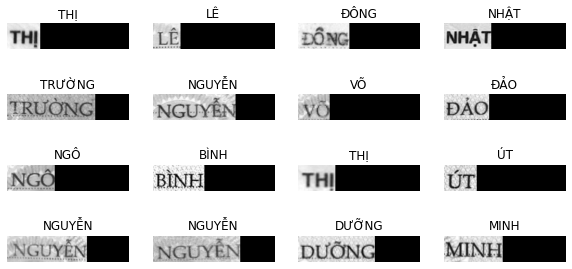

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10,5))

for batch in train_dataset.take(2):
  images = batch["image"]
  labels = batch["label"]
  for i in range(16):
    img = (images[i] * 255).numpy().astype("uint8")
    label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
    # print(label)
    label = label.replace(NULL_CHAR, "")
    # print(len(label))

    ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
plt.show()

# Buil Model CRNN



In [ ]:
class CTCLayer(layers.Layer):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    # Compute the training-time loss value and add it
    # to the layer using `self.add_loss()`.
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    # At test time, just return the computed predictions
    return y_pred
 

def char_acc(y_true, y_pred):
    # code calculate char acc and seq acc
    # return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
    pass 

def seq_acc(y_true, y_pred):
    # code calculate char acc and seq acc
    # return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
    pass


def build_model():
  #Inputs to the model
  input_img = layers.Input(
      shape=(img_width, img_height, 1), name="image", dtype="float32"
  )
  labels = layers.Input(name="label", shape=(None,), dtype="float32")
  
  # First conv block
  x = layers.Conv2D(
      32,
      (3, 3),
      activation="relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv1",
  )(input_img)
  
  x = layers.MaxPooling2D((2, 2), name="pool1")(x)

  # Second conv block
  x = layers.Conv2D(
      128,
      (3, 3),
      activation="relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv2",
  )(x)
  x = layers.MaxPooling2D((2, 2), name="pool2")(x)

  new_shape = ((img_width // 4), (img_height // 4) * 128)

  x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
  x = layers.Dense(64, activation="relu", name="dense1")(x)
  x = layers.Dropout(0.25)(x)

  # RNNs
  x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
  x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

  # Output layer
  x = layers.Dense(len(characters) + 1, activation="softmax", name="dense2")(x)
  # print(x)
  # Add CTC layer for calculating CTC loss at each step
  output = CTCLayer(name="ctc_loss")(labels, x)
  # print(output)
  # Define the model
  model = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
  )

  # Optimizer
  opt = keras.optimizers.Adam()
  
  # Compile the model and return
  model.compile(optimizer=opt)
  return model

# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 235, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 235, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 117, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 117, 25, 128) 36992       pool1[0][0]                      
_______________________________________________________________________________________

## Training   

In [ ]:
epochs = 100
early_stopping_patience = 10
# Add early stoppingima
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)  

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
344/344 [==============================] - 51s 39ms/step - loss: 32.1444 - val_loss: 12.8152
Epoch 2/100
344/344 [==============================] - 12s 34ms/step - loss: 12.4347 - val_loss: 10.8031
Epoch 3/100
344/344 [==============================] - 12s 34ms/step - loss: 10.5966 - val_loss: 9.6035
Epoch 4/100
344/344 [==============================] - 12s 34ms/step - loss: 9.6841 - val_loss: 9.1486
Epoch 5/100
344/344 [==============================] - 12s 34ms/step - loss: 9.2326 - val_loss: 8.8333
Epoch 6/100
344/344 [==============================] - 12s 34ms/step - loss: 8.9512 - val_loss: 8.5149
Epoch 7/100
344/344 [==============================] - 12s 34ms/step - loss: 8.7427 - val_loss: 8.4475
Epoch 8/100
344/344 [==============================] - 12s 35ms/step - loss: 8.6063 - val_loss: 8.1864
Epoch 9/100
344/344 [==============================] - 12s 34ms/step - loss: 8.4074 - val_loss: 7.9602
Epoch 10/100
344/344 [==============================] - 12s 34ms/ste

In [ ]:
model.save('./my_model.h5')

  ## Loss chart

68


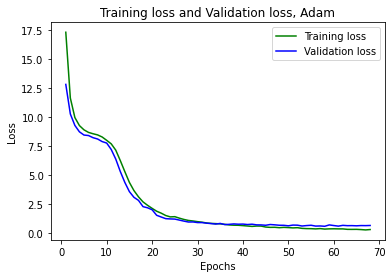

In [ ]:
loss_train = np.array(history.history['loss'])
loss_val = np.array(history.history['val_loss'])
print(len(loss_train))
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training loss and Validation loss, Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 235, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 235, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 117, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 117, 25, 128)      36992     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 58, 12, 128)       0         
_________________________________________________________________
reshape (Reshape)            (None, 58, 1536)          0         
_________________________________________________________________
dense1 (Dense)               (None, 58, 64)            98368 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


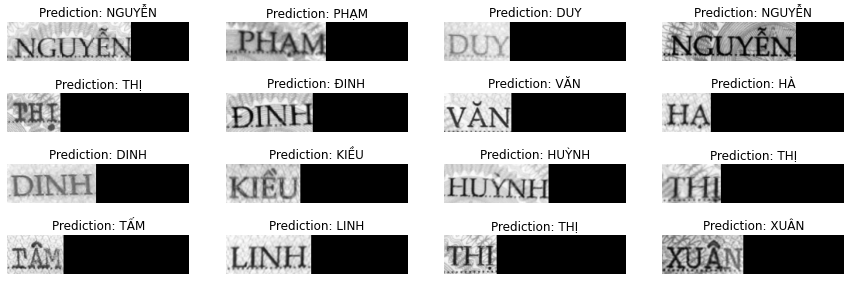

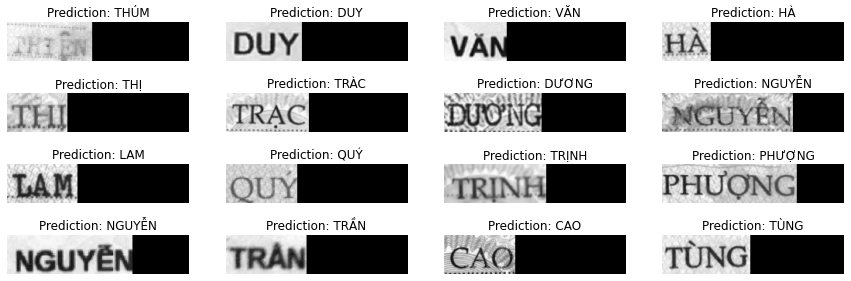

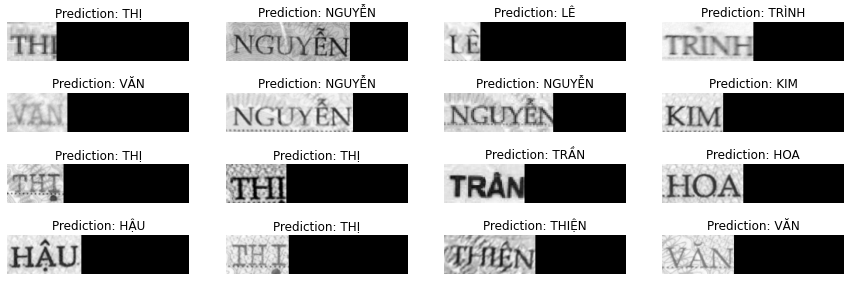

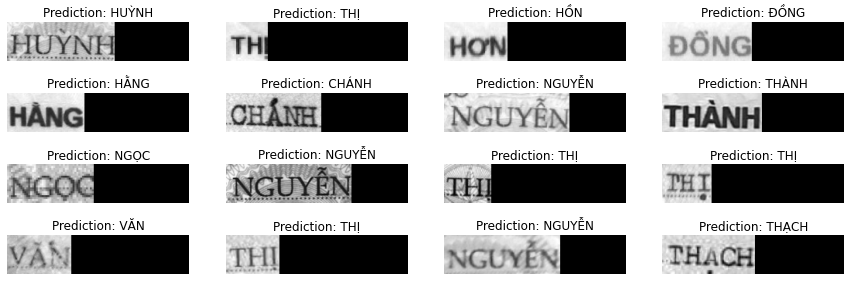

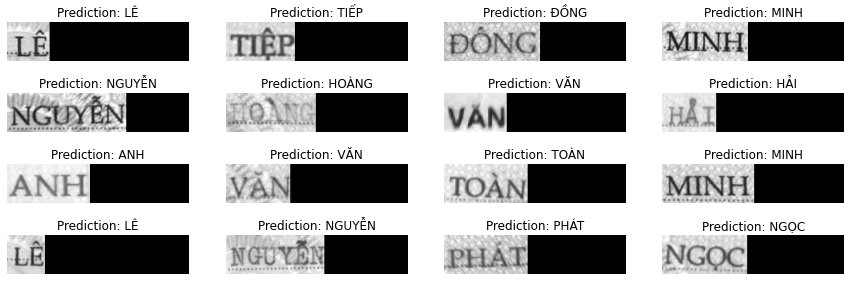

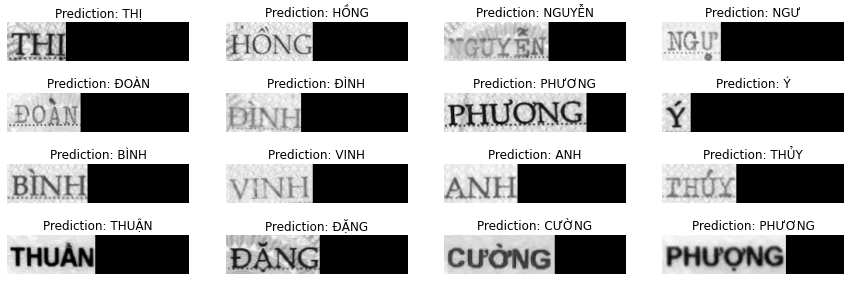

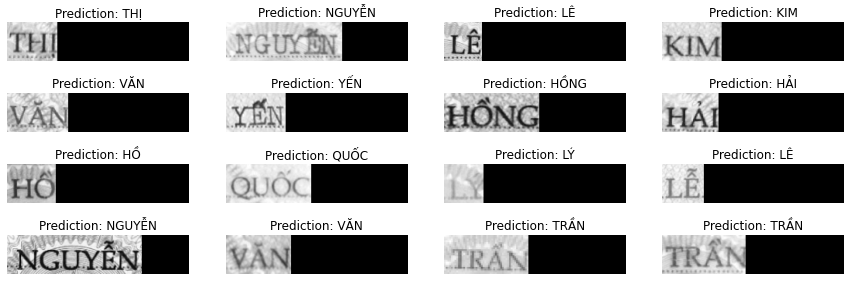

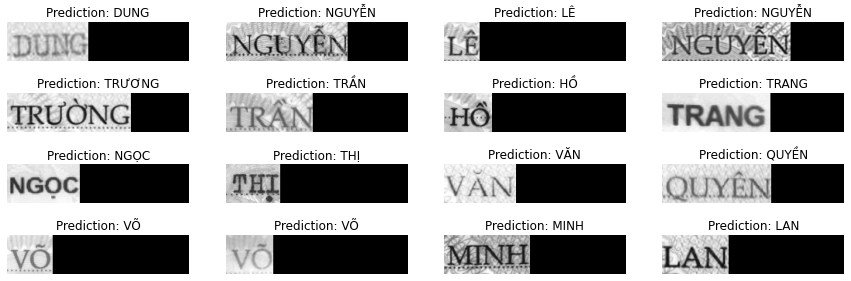

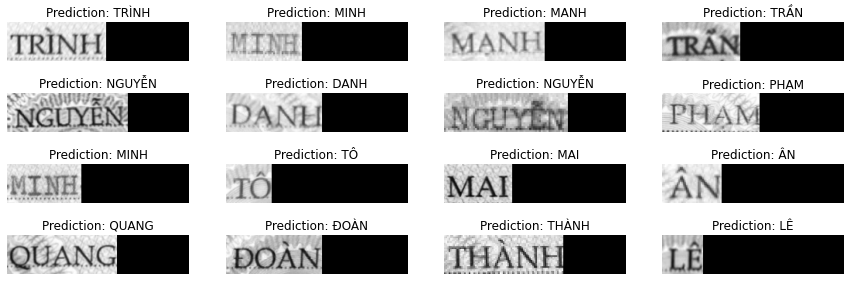

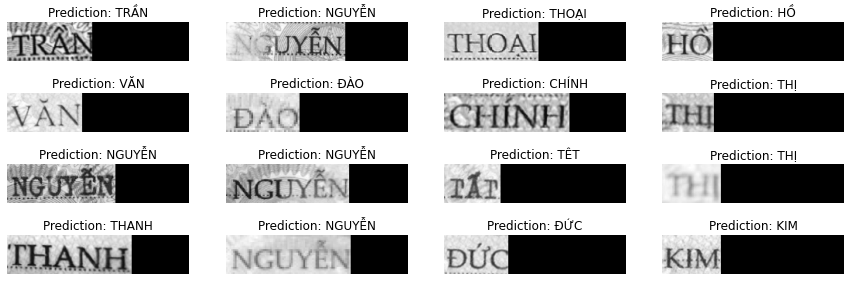

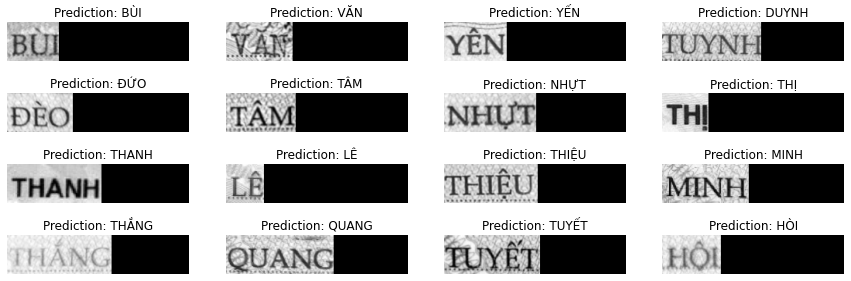

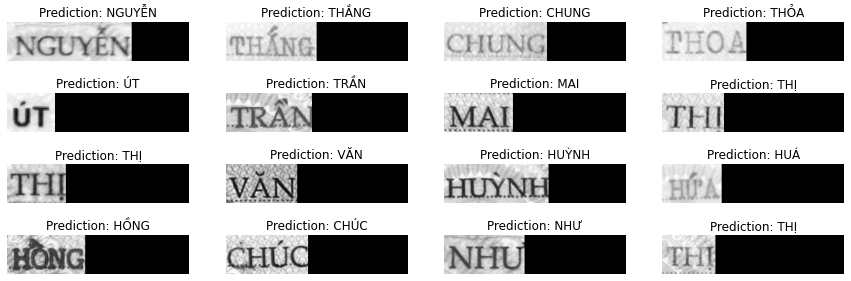

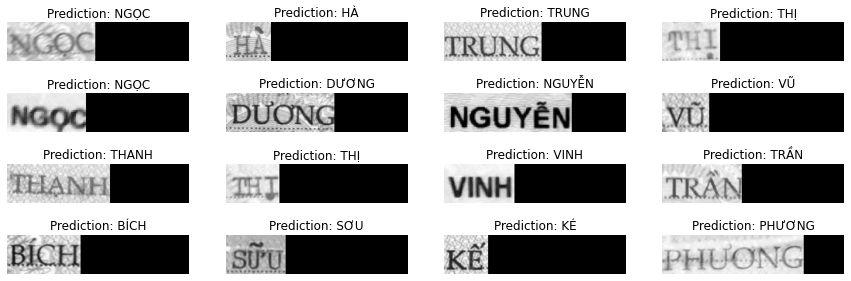

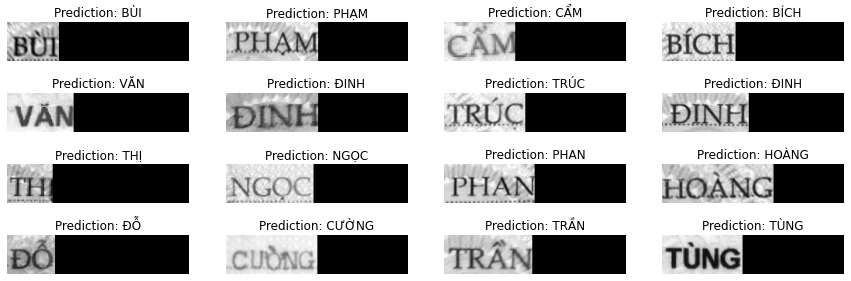

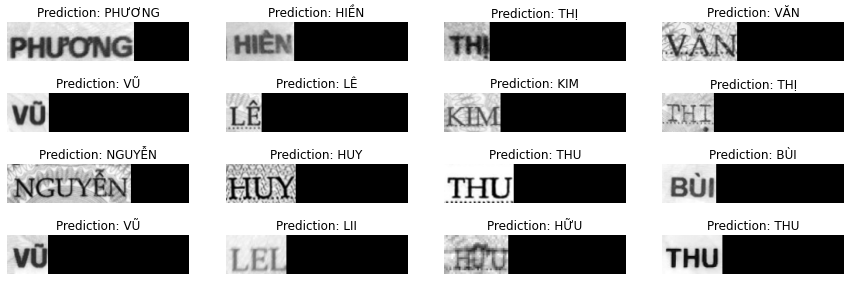

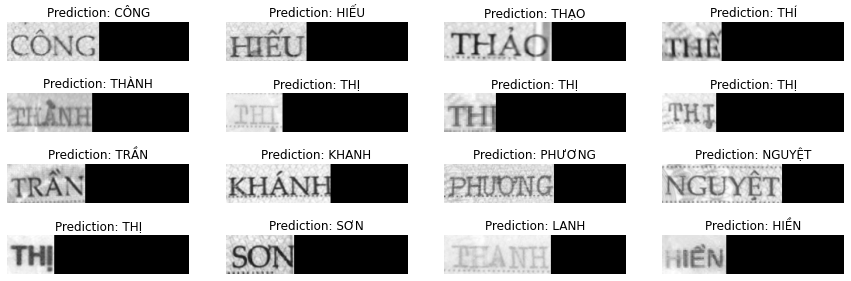

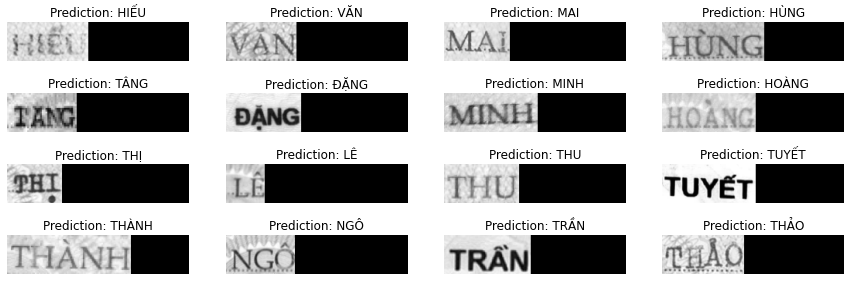

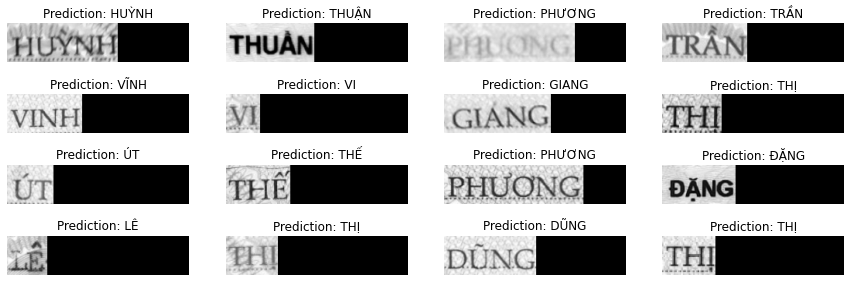

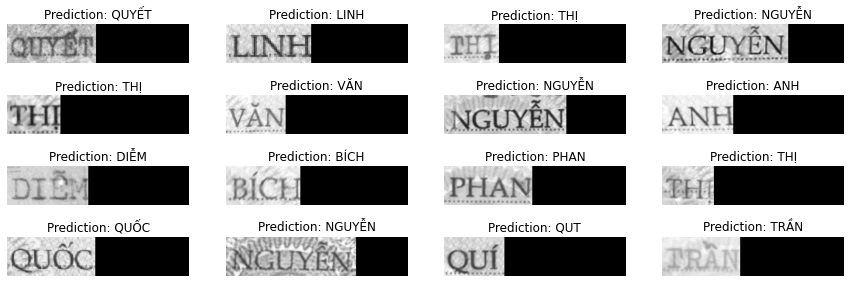

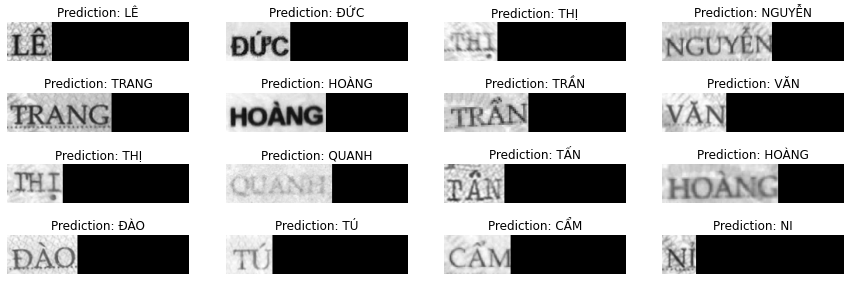

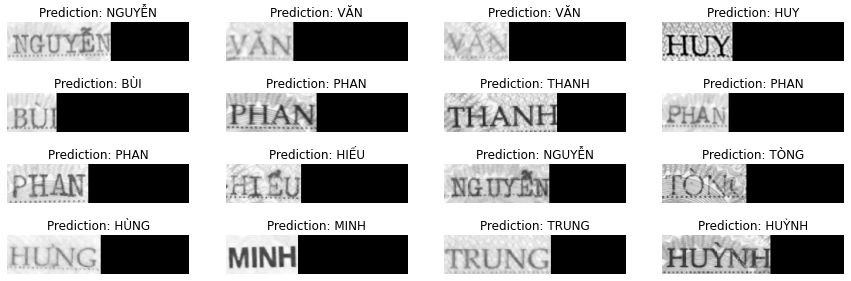

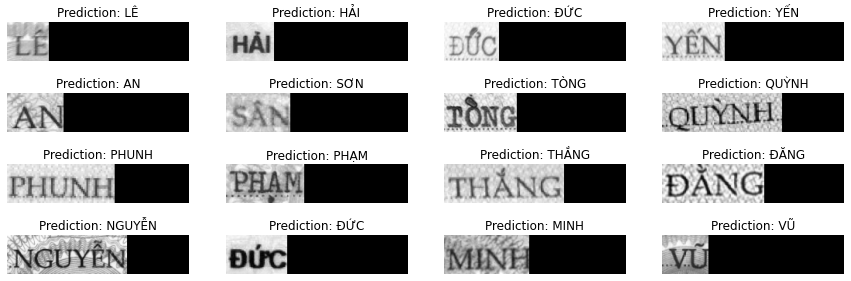

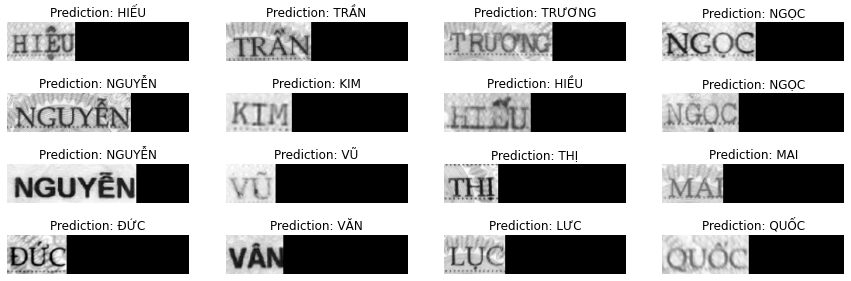

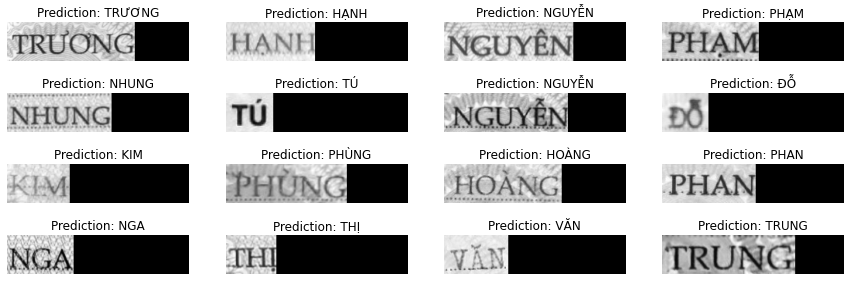

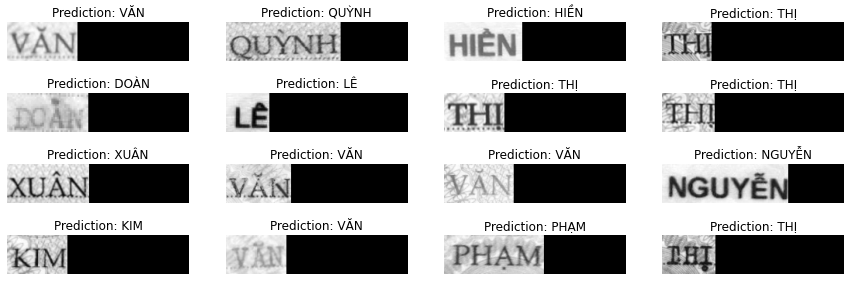

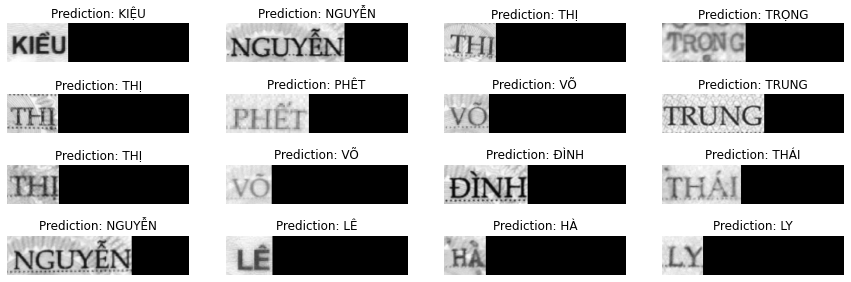

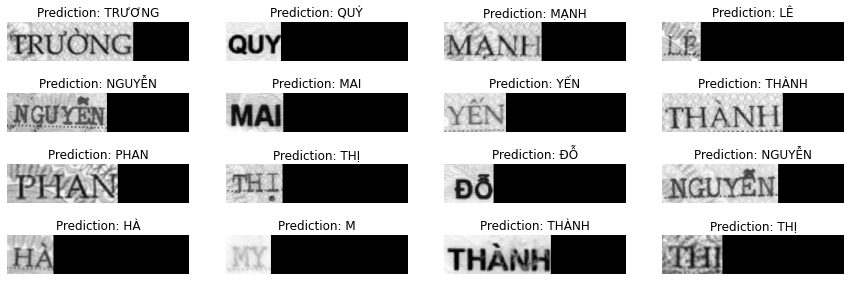

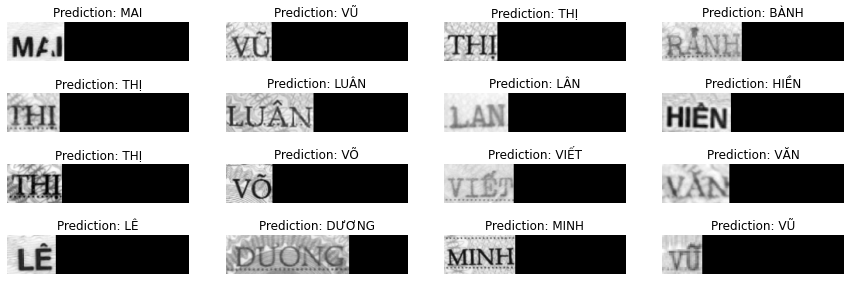

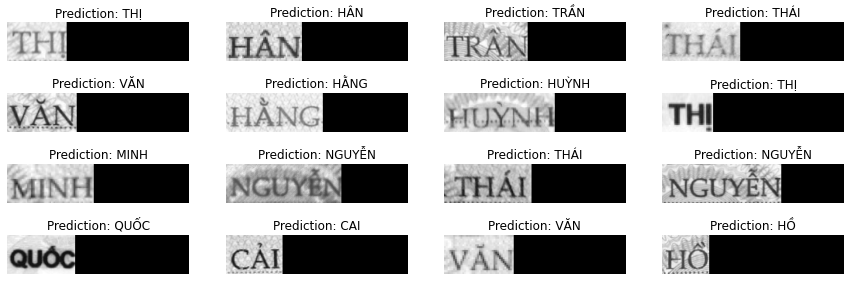

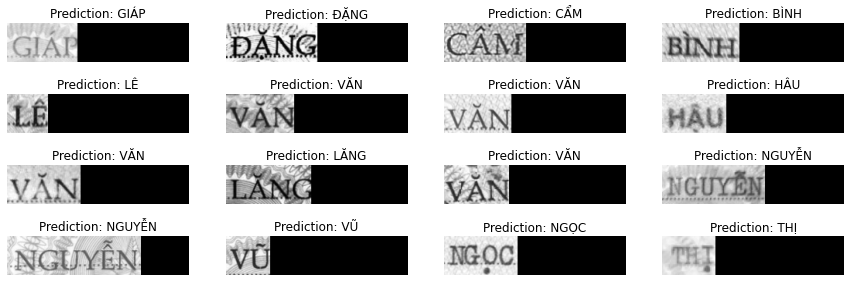

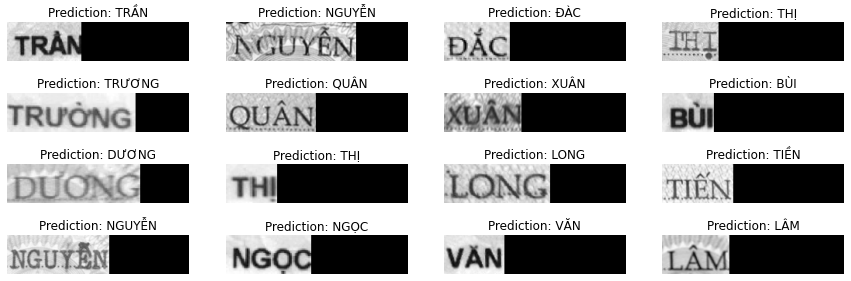

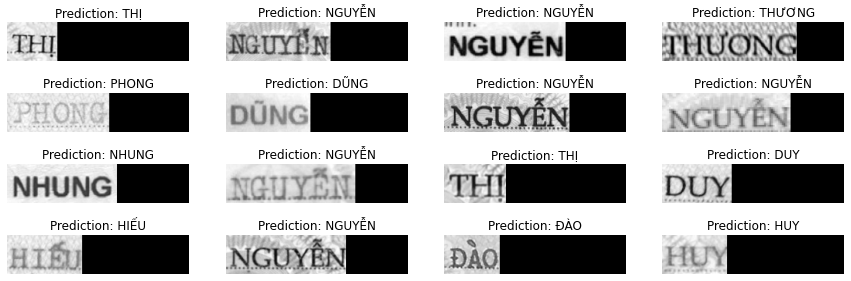

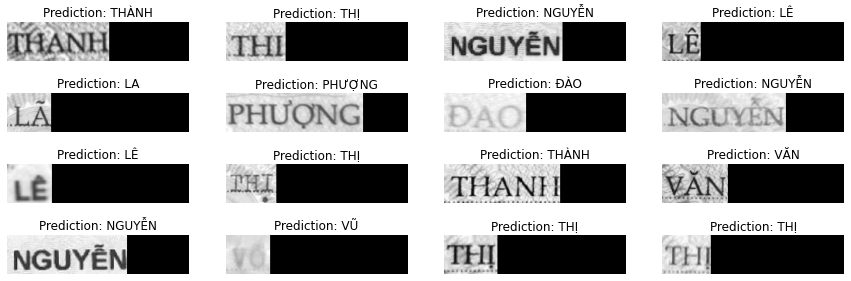

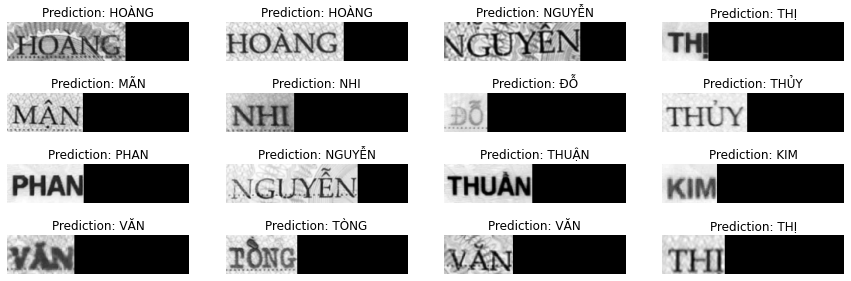

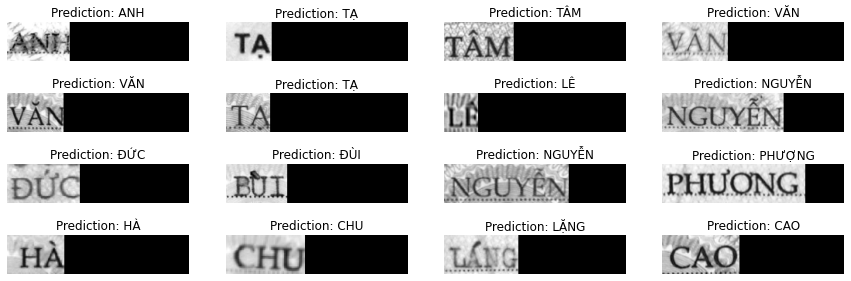

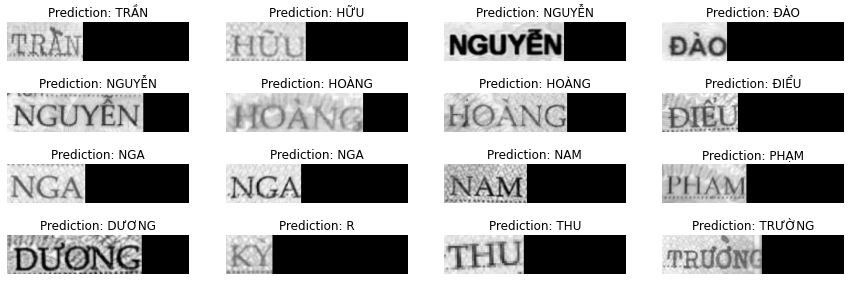

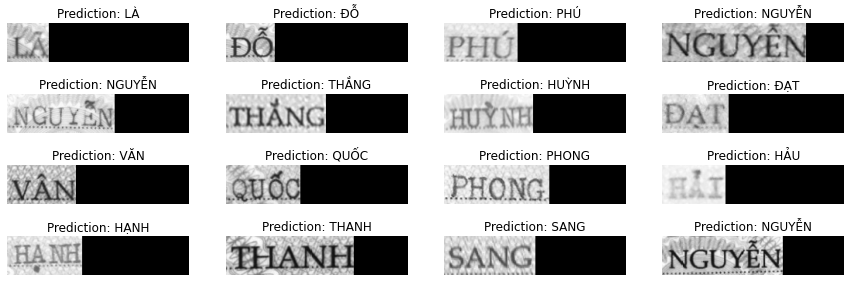

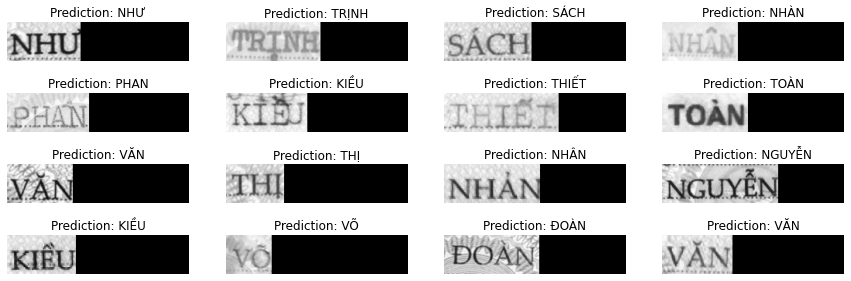

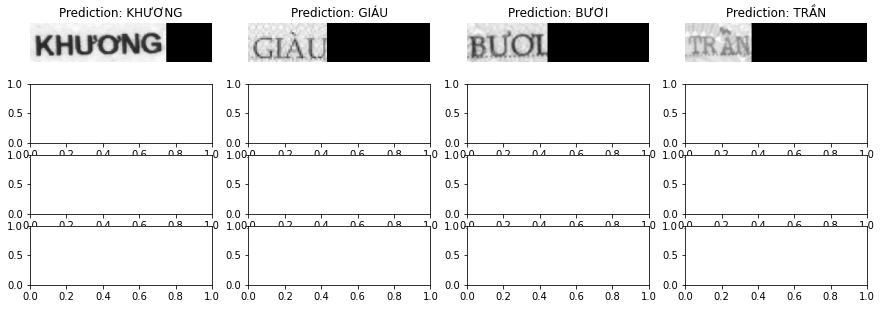

In [ ]:
max_length = max([len(label) for label in labels])

prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # print(input_len)
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_length]
    # print(pred)
    # print(results)
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

orig_texts = []
predict = []
for batch in validation_dataset.take(50):
  batch_images = batch["image"]
  # print(batch_images)

  batch_labels = batch["label"]
  preds = prediction_model.predict(batch_images)
  pred_texts = decode_batch_predictions(preds)

  for label in batch_labels:
    
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")  
    label = label.replace(NULL_CHAR, "")
    orig_texts.append(label)

  _, ax = plt.subplots(4, 4, figsize=(15, 5))

  
  for i in range(len(pred_texts)):
    img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
    img = img.T

    label_predict = pred_texts[i].replace("[UNK]","")
    predict.append(label_predict)
    title = f"Prediction: {label_predict}"
    ax[i // 4, i % 4].imshow(img, cmap='gray')
    ax[i // 4, i % 4].set_title(title)
    ax[i // 4, i % 4].axis("off")
plt.show()



##Evaluated accuracy model

In [ ]:
print(orig_texts)
print(len(orig_texts))
print(predict)

['NGUYỄN', 'PHẠM', 'DUY', 'NGUYỄN', 'THỊ', 'ĐINH', 'VĂN', 'HẠ', 'DINH', 'KIỀU', 'HUỲNH', 'THỊ', 'TÂM', 'LINH', 'THỊ', 'XUÂN', 'THIỆN', 'DUY', 'VĂN', 'HÀ', 'THỊ', 'TRẠC', 'DƯƠNG', 'NGUYỄN', 'LAM', 'QUÝ', 'TRỊNH', 'PHƯỢNG', 'NGUYỄN', 'TRẦN', 'CAO', 'TÙNG', 'THỊ', 'NGUYỄN', 'LÊ', 'TRÌNH', 'VĂN', 'NGUYỄN', 'NGUYỄN', 'KIM', 'THỊ', 'THỊ', 'TRẦN', 'HOA', 'HẬU', 'THỊ', 'THIỆN', 'VĂN', 'HUỲNH', 'THỊ', 'HƠN', 'ĐỒNG', 'HẰNG', 'CHÁNH', 'NGUYỄN', 'THÀNH', 'NGỌC', 'NGUYỄN', 'THỊ', 'THỊ', 'VĂN', 'THỊ', 'NGUYỄN', 'THẠCH', 'LÊ', 'TIỆP', 'ĐÔNG', 'MINH', 'NGUYỄN', 'HOÀNG', 'VĂN', 'HẢI', 'ANH', 'VĂN', 'TOÀN', 'MINH', 'LÊ', 'NGUYỄN', 'PHÁT', 'NGỌC', 'THỊ', 'HỒNG', 'NGUYỄN', 'NGỰ', 'ĐOÀN', 'ĐÌNH', 'PHƯƠNG', 'Ý', 'BÌNH', 'VINH', 'ANH', 'THÚY', 'THUẦN', 'ĐẶNG', 'CƯỜNG', 'PHƯỢNG', 'THỊ', 'NGUYỄN', 'LÊ', 'KIM', 'VĂN', 'YẾN', 'HỒNG', 'HẢI', 'HỒ', 'QUỐC', 'LÝ', 'LÊ', 'NGUYỄN', 'VĂN', 'TRẦN', 'TRẦN', 'DUNG', 'NGUYỄN', 'LÊ', 'NGUYỄN', 'TRƯỜNG', 'TRẦN', 'HỒ', 'TRANG', 'NGỌC', 'THỊ', 'VĂN', 'QUYÊN', 'VÕ', 'VÕ', 'MINH

In [ ]:
#words
count = 0
for i in range(len(orig_texts)):
  if orig_texts[i] == predict[i]:
    count += 1
acc = round(count/len(orig_texts)*100, 2)
print("Accuracy words validation data:" +str(acc)+"%")


Accuracy words validation data:87.91%


In [ ]:
for i in range(len(orig_texts)):
  if orig_texts[i] == predict[i]:
    print("accuracy seq: 100%, (word: {})".format(orig_texts[i]))
  else:
    count = 0
    for j in range(min(len(orig_texts[i]), len(predict[i]))):
      if orig_texts[i][j] == predict[i][j]:
        count += 1
       
    print("Accuracy seq: 0%, accuracy character: {}/{}".format(count, len(orig_texts[i])))
    print("Origin text: {}, predict text: {}".format(orig_texts[i], predict[i]))

accuracy seq: 100%, (word: NGUYỄN)
accuracy seq: 100%, (word: PHẠM)
accuracy seq: 100%, (word: DUY)
accuracy seq: 100%, (word: NGUYỄN)
accuracy seq: 100%, (word: THỊ)
accuracy seq: 100%, (word: ĐINH)
accuracy seq: 100%, (word: VĂN)
Accuracy seq: 0%, accuracy character: 1/2
Origin text: HẠ, predict text: HÀ
accuracy seq: 100%, (word: DINH)
accuracy seq: 100%, (word: KIỀU)
accuracy seq: 100%, (word: HUỲNH)
accuracy seq: 100%, (word: THỊ)
Accuracy seq: 0%, accuracy character: 2/3
Origin text: TÂM, predict text: TẤM
accuracy seq: 100%, (word: LINH)
accuracy seq: 100%, (word: THỊ)
accuracy seq: 100%, (word: XUÂN)
Accuracy seq: 0%, accuracy character: 2/5
Origin text: THIỆN, predict text: THÚM
accuracy seq: 100%, (word: DUY)
accuracy seq: 100%, (word: VĂN)
accuracy seq: 100%, (word: HÀ)
accuracy seq: 100%, (word: THỊ)
Accuracy seq: 0%, accuracy character: 3/4
Origin text: TRẠC, predict text: TRÀC
accuracy seq: 100%, (word: DƯƠNG)
accuracy seq: 100%, (word: NGUYỄN)
accuracy seq: 100%, (word: 

In [ ]:
#characters

for i in range(len(characters)):
  count = 0
  count_c = 0
  for j in range(len(orig_texts)):
    temp = 10
    if len(orig_texts[j]) != len(predict[j]):
      temp = min(len(orig_texts[j]), len(predict[j]))

    for k in range(min(len(orig_texts[j]), temp)):
      if orig_texts[j][k] == characters[i]:
        count += 1
        if orig_texts[j][k] == predict[j][k]:
          count_c += 1
  if count != 0:
    print('accuracy character '+ characters[i] +': '+ str(round(count_c / count, 2)*100))
  else:
    print('accuracy character '+ characters[i] +': '+str(count))


accuracy character A: 91.0
accuracy character B: 92.0
accuracy character C: 100.0
accuracy character D: 100.0
accuracy character E: 0.0
accuracy character F: 0
accuracy character G: 100.0
accuracy character H: 100.0
accuracy character I: 94.0
accuracy character J: 0
accuracy character K: 94.0
accuracy character L: 100.0
accuracy character M: 100.0
accuracy character N: 100.0
accuracy character O: 97.0
accuracy character P: 100.0
accuracy character Q: 100.0
accuracy character R: 97.0
accuracy character S: 100.0
accuracy character T: 99.0
accuracy character U: 99.0
accuracy character V: 100.0
accuracy character W: 0
accuracy character X: 100.0
accuracy character Y: 99.0
accuracy character Z: 0
accuracy character À: 94.0
accuracy character Á: 78.0
accuracy character Â: 59.0
accuracy character Ã: 0.0
accuracy character È: 0
accuracy character É: 0
accuracy character Ê: 84.0
accuracy character Ì: 100.0
accuracy character Í: 80.0
accuracy character Ò: 100.0
accuracy character Ó: 0
accuracy c

##CER (Character Error Rate)

In [ ]:
def dist(x, m, y, n):
  if m == 0:
    return n
  if n == 0:
    return m
  cost = 0 if(x[m - 1] == y[n - 1]) else 1
  return min(dist(x, m - 1, y, n)+1, dist(x, m, y, n - 1) + 1, dist(x, m - 1, y, n - 1) + cost)

cer = 0
for i in range(len(orig_texts)):
  x = orig_texts[i]
  y = predict[i]
  lenvenshtein = dist(x, len(x), y, len(y))
  _max = len(x)
  cer_i = lenvenshtein/_max
  cer += cer_i
  # print("cer_i: ", round(cer_i, 2), " / Acurracy",round((1-cer_i)*100, 2),"%")  

print("Accuracy characters base on CER: ", round((1-cer/len(orig_texts))*100, 2),"%")


Accuracy characters base on CER:  96.07 %
